In [3]:
from sklearn.datasets import load_boston

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=load_boston()

In [7]:
# data

In [9]:
df=pd.DataFrame(data.data)

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [28]:
df.columns=data.feature_names

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
df.CRIM.shape

(506,)

In [25]:
data.target.shape

(506,)

In [29]:
df['Price']=data.target

In [32]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [87]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [88]:
type(y)

pandas.core.series.Series

### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
lr=LinearRegression()
mse=cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

NameError: name 'X' is not defined

In [ ]:
mean_mse=np.mean(mse)

In [6]:
mean_mse

NameError: name 'mean_mse' is not defined

### Ridge

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [106]:
1*10**-15

1e-15

In [136]:
r=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-2,1,10,15,20,25,30,35,40,50,55]}
r_regg=GridSearchCV(r,params,scoring='neg_mean_squared_error',cv=5)
r_regg.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 10, 15, 20, 25,
                                   30, 35, 40, 50, 55]},
             scoring='neg_mean_squared_error')

In [137]:
r_regg


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 10, 15, 20, 25,
                                   30, 35, 40, 50, 55]},
             scoring='neg_mean_squared_error')

In [141]:
print(r_regg.best_estimator_)

Ridge(alpha=55)


In [139]:
r_regg.best_score_

-30.61720576886794

In [140]:
r_regg.cv

5

### Lasso

In [162]:
from sklearn.linear_model import Lasso

In [170]:
l=Lasso()
l_regg=GridSearchCV(l,params,cv=5,scoring='neg_mean_squared_error')
l_regg.fit(X,y)

C:\Users\monis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\monis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\monis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\monis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 10, 15, 20, 25,
                                   30, 35, 40, 50, 55]},
             scoring='neg_mean_squared_error')

In [171]:
l_regg.best_estimator_

Lasso(alpha=1)

In [172]:
l_regg.best_score_

-35.53158022069486

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [194]:
r_pre=r_regg.predict(X_test)
l_pre=l_regg.predict(X_test)

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

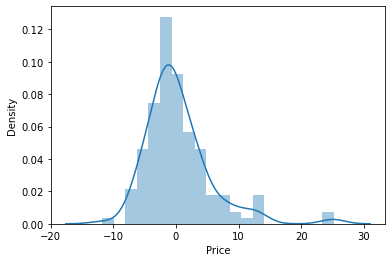

In [195]:
sns.distplot(y_test-r_pre)

C:\Users\monis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

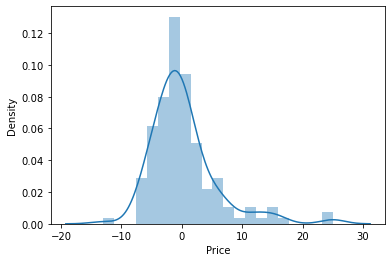

In [196]:
sns.distplot(y_test-l_pre)